## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import operator

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

### Correlation

In [5]:
features = data.loc[:,data.columns!='target']
features.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

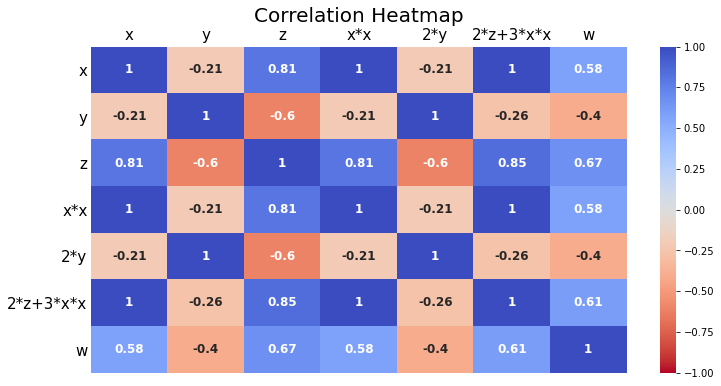

In [6]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(features.corr(), vmin=-1, vmax=1, annot=True,annot_kws={"fontsize":12,"weight": "bold"}, cmap='coolwarm_r')
heatmap.tick_params(axis='both', which='major', labelsize=15, labelbottom = False, bottom=False, top = False, labeltop=True,length = 0)
heatmap.set_title('Correlation Heatmap',fontsize = 20)


### Logistic Regression

In [7]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [8]:
data['target'].value_counts()

0    50
1    50
Name: target, dtype: int64

In [9]:
alpha = [0.000001,0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
param_grid = dict(alpha=alpha,loss = ['log'])
model  = SGDClassifier(eta0=0.001, learning_rate='constant',random_state=0)
clf = GridSearchCV(estimator = model,param_grid = param_grid,cv = 10)
clf.fit(X_train, Y_train) 
print('Best Score: ', clf.best_score_) 
print('Best Params: ', clf.best_params_)

best_model = SGDClassifier(loss = 'log',alpha = 1e-06,eta0 = 0.001,learning_rate='constant',random_state=0)
best_model.fit(X_train,Y_train)

Best Score:  1.0
Best Params:  {'alpha': 1e-06, 'loss': 'log'}


SGDClassifier(alpha=1e-06, eta0=0.001, learning_rate='constant', loss='log',
              random_state=0)

In [10]:
best_model_accuracy = best_model.score(X_test,Y_test)
print (best_model_accuracy)

W = best_model.coef_
print (W)

1.0
[[ 0.46542926 -0.58314008  0.78624593  0.45498958 -0.58314008  0.50442001
   0.45342169]]


#### Adding noise

In [11]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

e = 0.001
X_n = X + e 

X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size=0.25, random_state=10)

In [12]:
best_model.fit(X_train,Y_train)
best_model_accuracy_edited = best_model.score(X_test,Y_test)
print (best_model_accuracy_edited)

W_n =  best_model.coef_
print (W_n)

1.0
[[ 0.46547869 -0.58310077  0.78627186  0.45504687 -0.58310077  0.50447408
   0.45345173]]


In [13]:
accuracy_diff = best_model_accuracy_edited - best_model_accuracy
print (accuracy_diff)

features = data.columns
weights_diff = list((np.absolute((W-W_n)/W)*100))[0]
print (weights_diff)

0.0
[0.0106202  0.00674131 0.00329804 0.01259011 0.00674131 0.01071948
 0.00662475]


In [14]:
diff_dict = {A:B  for A,B in zip(features, weights_diff)}
dict( sorted(diff_dict.items(), key=operator.itemgetter(1),reverse=True))

{'x*x': 0.012590105974016027,
 '2*z+3*x*x': 0.01071948187592441,
 'x': 0.010620200375014172,
 'y': 0.006741312075772352,
 '2*y': 0.006741312075772352,
 'w': 0.00662475217518367,
 'z': 0.00329803730137029}

####

## Linear SVM

In [325]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [326]:
alpha = [0.000001,0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
param_grid = dict(alpha=alpha,loss = ['hinge'])
model_svm  = SGDClassifier(eta0=0.001, learning_rate='constant',random_state=0)
clf_svm = GridSearchCV(estimator = model_svm,param_grid = param_grid,cv = 10)
clf_svm.fit(X_train, Y_train) 
print('Best Score: ', clf_svm.best_score_) 
print('Best Params: ', clf_svm.best_params_)

best_model_svm = SGDClassifier(loss = 'hinge',alpha = 1e-06,eta0 = 0.001,learning_rate='constant',random_state = 0)
best_model_svm.fit(X_train,Y_train)

Best Score:  1.0
Best Params:  {'alpha': 1e-06, 'loss': 'hinge'}


SGDClassifier(alpha=1e-06, eta0=0.001, learning_rate='constant', random_state=0)

In [327]:
best_model_accuracy_svm = best_model_svm.score(X_test,Y_test)
print (best_model_accuracy_svm)

W_svm = best_model_svm.coef_
print (W_svm)

1.0
[[ 0.23441815 -0.36262337  0.51394284  0.22598446 -0.36262337  0.26543754
   0.24117219]]


#### Adding noise

In [328]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

e = 0.001
X_n = X + e 

X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size=0.25, random_state=10)

In [329]:
best_model_svm.fit(X_train,Y_train)
best_model_accuracy_edited_svm = best_model_svm.score(X_test,Y_test)
print (best_model_accuracy_edited_svm)

W_n_svm =  best_model_svm.coef_
print (W_n_svm)

1.0
[[ 0.23448615 -0.36255537  0.51401084  0.22605246 -0.36255537  0.26550554
   0.24124019]]


In [330]:
accuracy_diff_svm = best_model_accuracy_edited_svm - best_model_accuracy_svm
print (accuracy_diff_svm)

features = data.columns
weights_diff_svm = list((np.absolute((W_svm-W_n_svm)/W_svm)*100))[0]
print (weights_diff_svm)

0.0
[0.02900797 0.01875222 0.01323103 0.03009054 0.01875222 0.02561806
 0.0281956 ]


In [331]:
diff_dict_svm = {A:B  for A,B in zip(features, weights_diff_svm)}
dict( sorted(diff_dict_svm.items(), key=operator.itemgetter(1),reverse=True))

{'x*x': 0.030090536800693495,
 'x': 0.029007966627896682,
 'w': 0.028195596863972727,
 '2*z+3*x*x': 0.02561805588757665,
 'y': 0.018752221496474843,
 '2*y': 0.018752221496474843,
 'z': 0.01323103130125866}